[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/storopoli/ciencia-de-dados/master?filepath=notebooks%2FAula_8_pandas_estatistica.ipynb)

In [8]:
# Para mostrar as imagens com DPI de alta qualidade
%matplotlib inline
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 300

# `pandas` estatística

**Objetivo**: Apresentar o que é estatística pela biblioteca pandas. Abordar quantis, média, mediana, desvio padrão, assimetria, curtose, correlação, covariância.

# Estatística

* média
* mediana
* moda
* desvio padrão
* quantis
* assimetria
* curtose
* correlação
* covariância

## Distribuição Normal

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

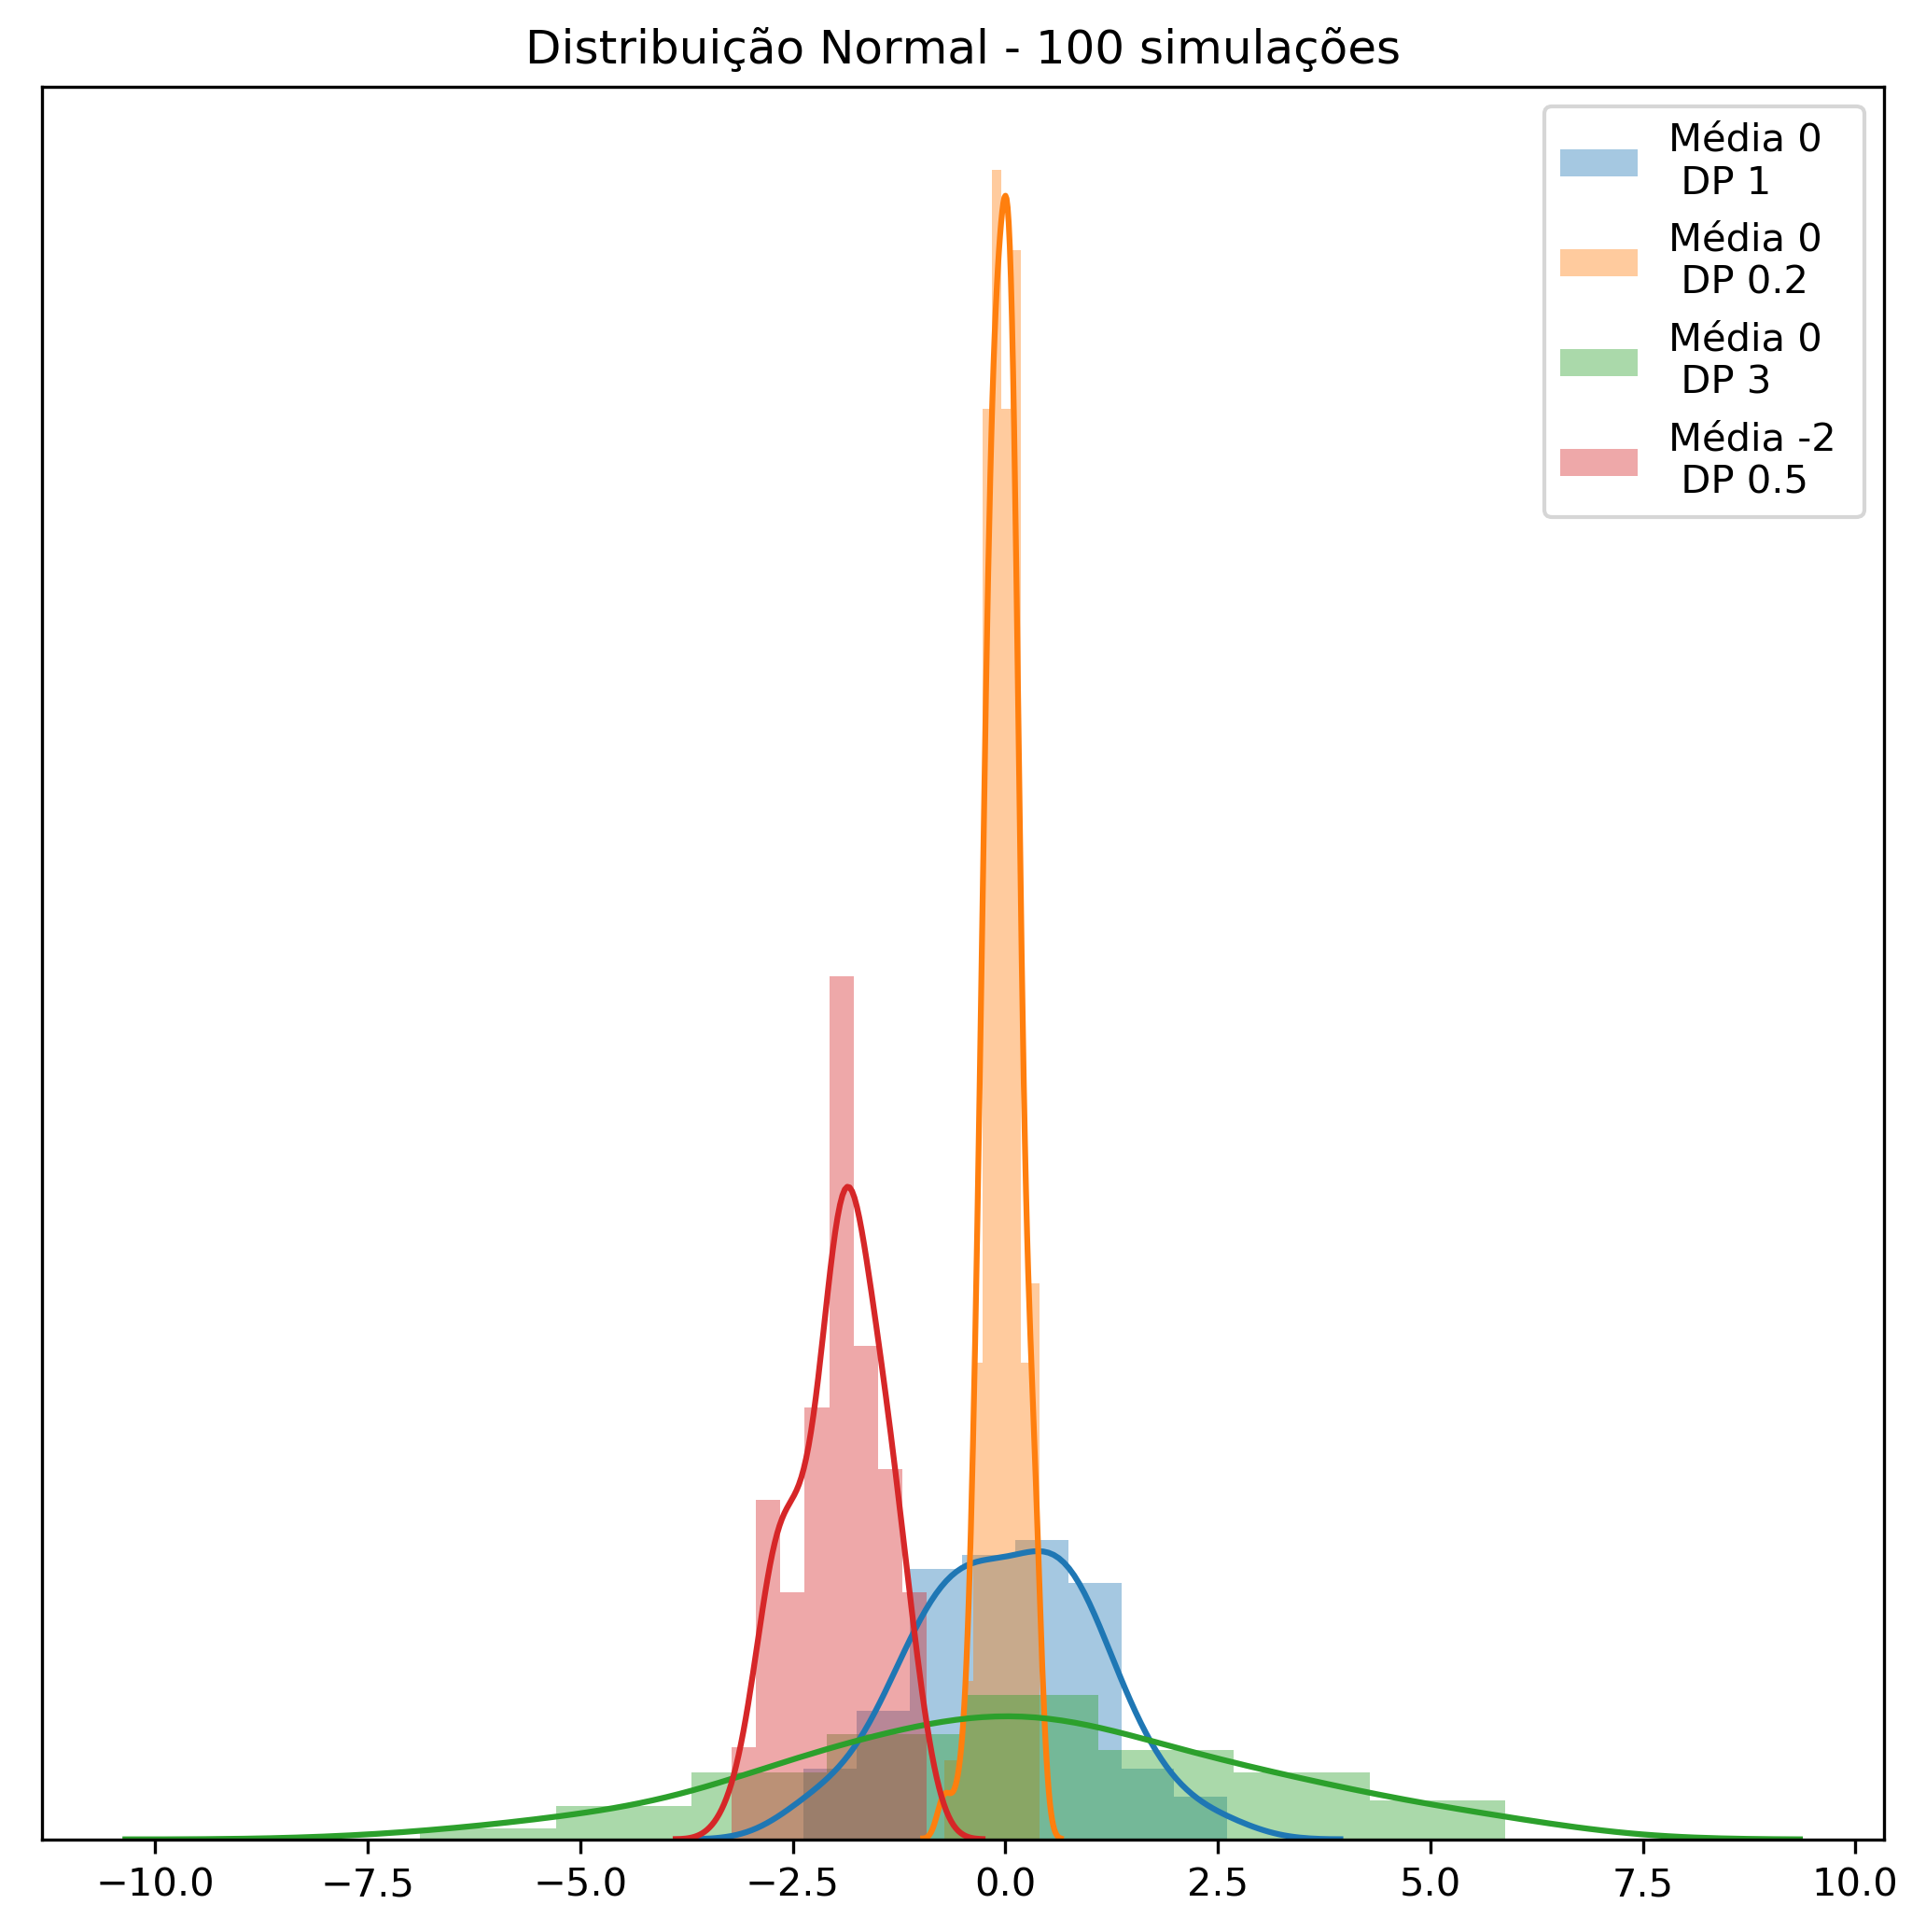

In [32]:
f, axes = plt.subplots(1, 1, figsize=(7, 7), sharex=True)
size = 100
for mean, std in [(0, 1), (0, 0.2), (0, 3), (-2, 0.5)]:
    data = norm.rvs(mean, std, size=size)
    sns.distplot(data, label=f"Média {mean} \n DP {std}")

title = f"Distribuição Normal - {size} simulações"
plt.title(title)
axes.legend()
plt.setp(axes, yticks=[])
plt.tight_layout()

## Média

## Mediana

## Moda

## Desvio Padrão

## Quantis / Percentis

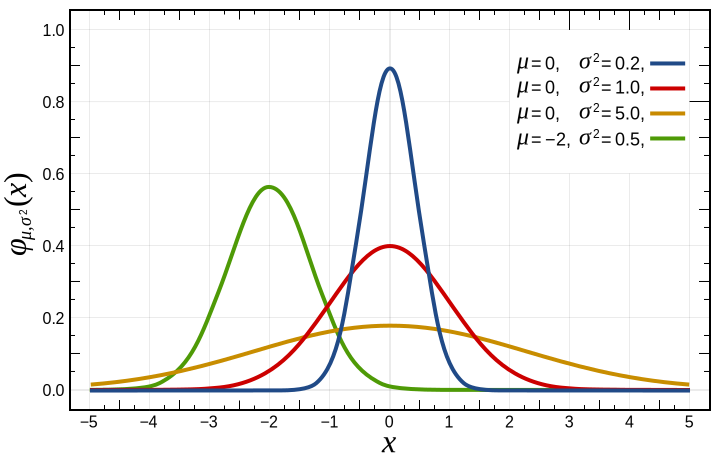

In [3]:
from IPython.display import SVG
SVG('images/Normal_Distribution_PDF.svg')

## Assimetria

![assimetria](images/assimetria.jpg)

## Curtose

![curtose](images/curtose.png)

In [14]:
import pandas as pd
import seaborn as sns

iris = sns.load_dataset("iris")

## Dataset [*Iris*](https://en.wikipedia.org/wiki/Iris_flower_data_set)

Edgar Anderson coletou os dados para quantificar a variação morfológica das flores de íris de três espécies relacionadas.

O conjunto de dados consiste em 50 amostras de cada uma das três espécies de Iris  (Setosa, Virginica e Iris Versicolor). Quatro características foram medidas em cada amostra (cm):

* comprimento das sépalas
* largura  das sépalas
* comprimento das pétalas
* largura das pétalas

![iris-sepals-petals](https://thegoodpython.com/assets/images/iris-species.png)

## Correlação e Covariância

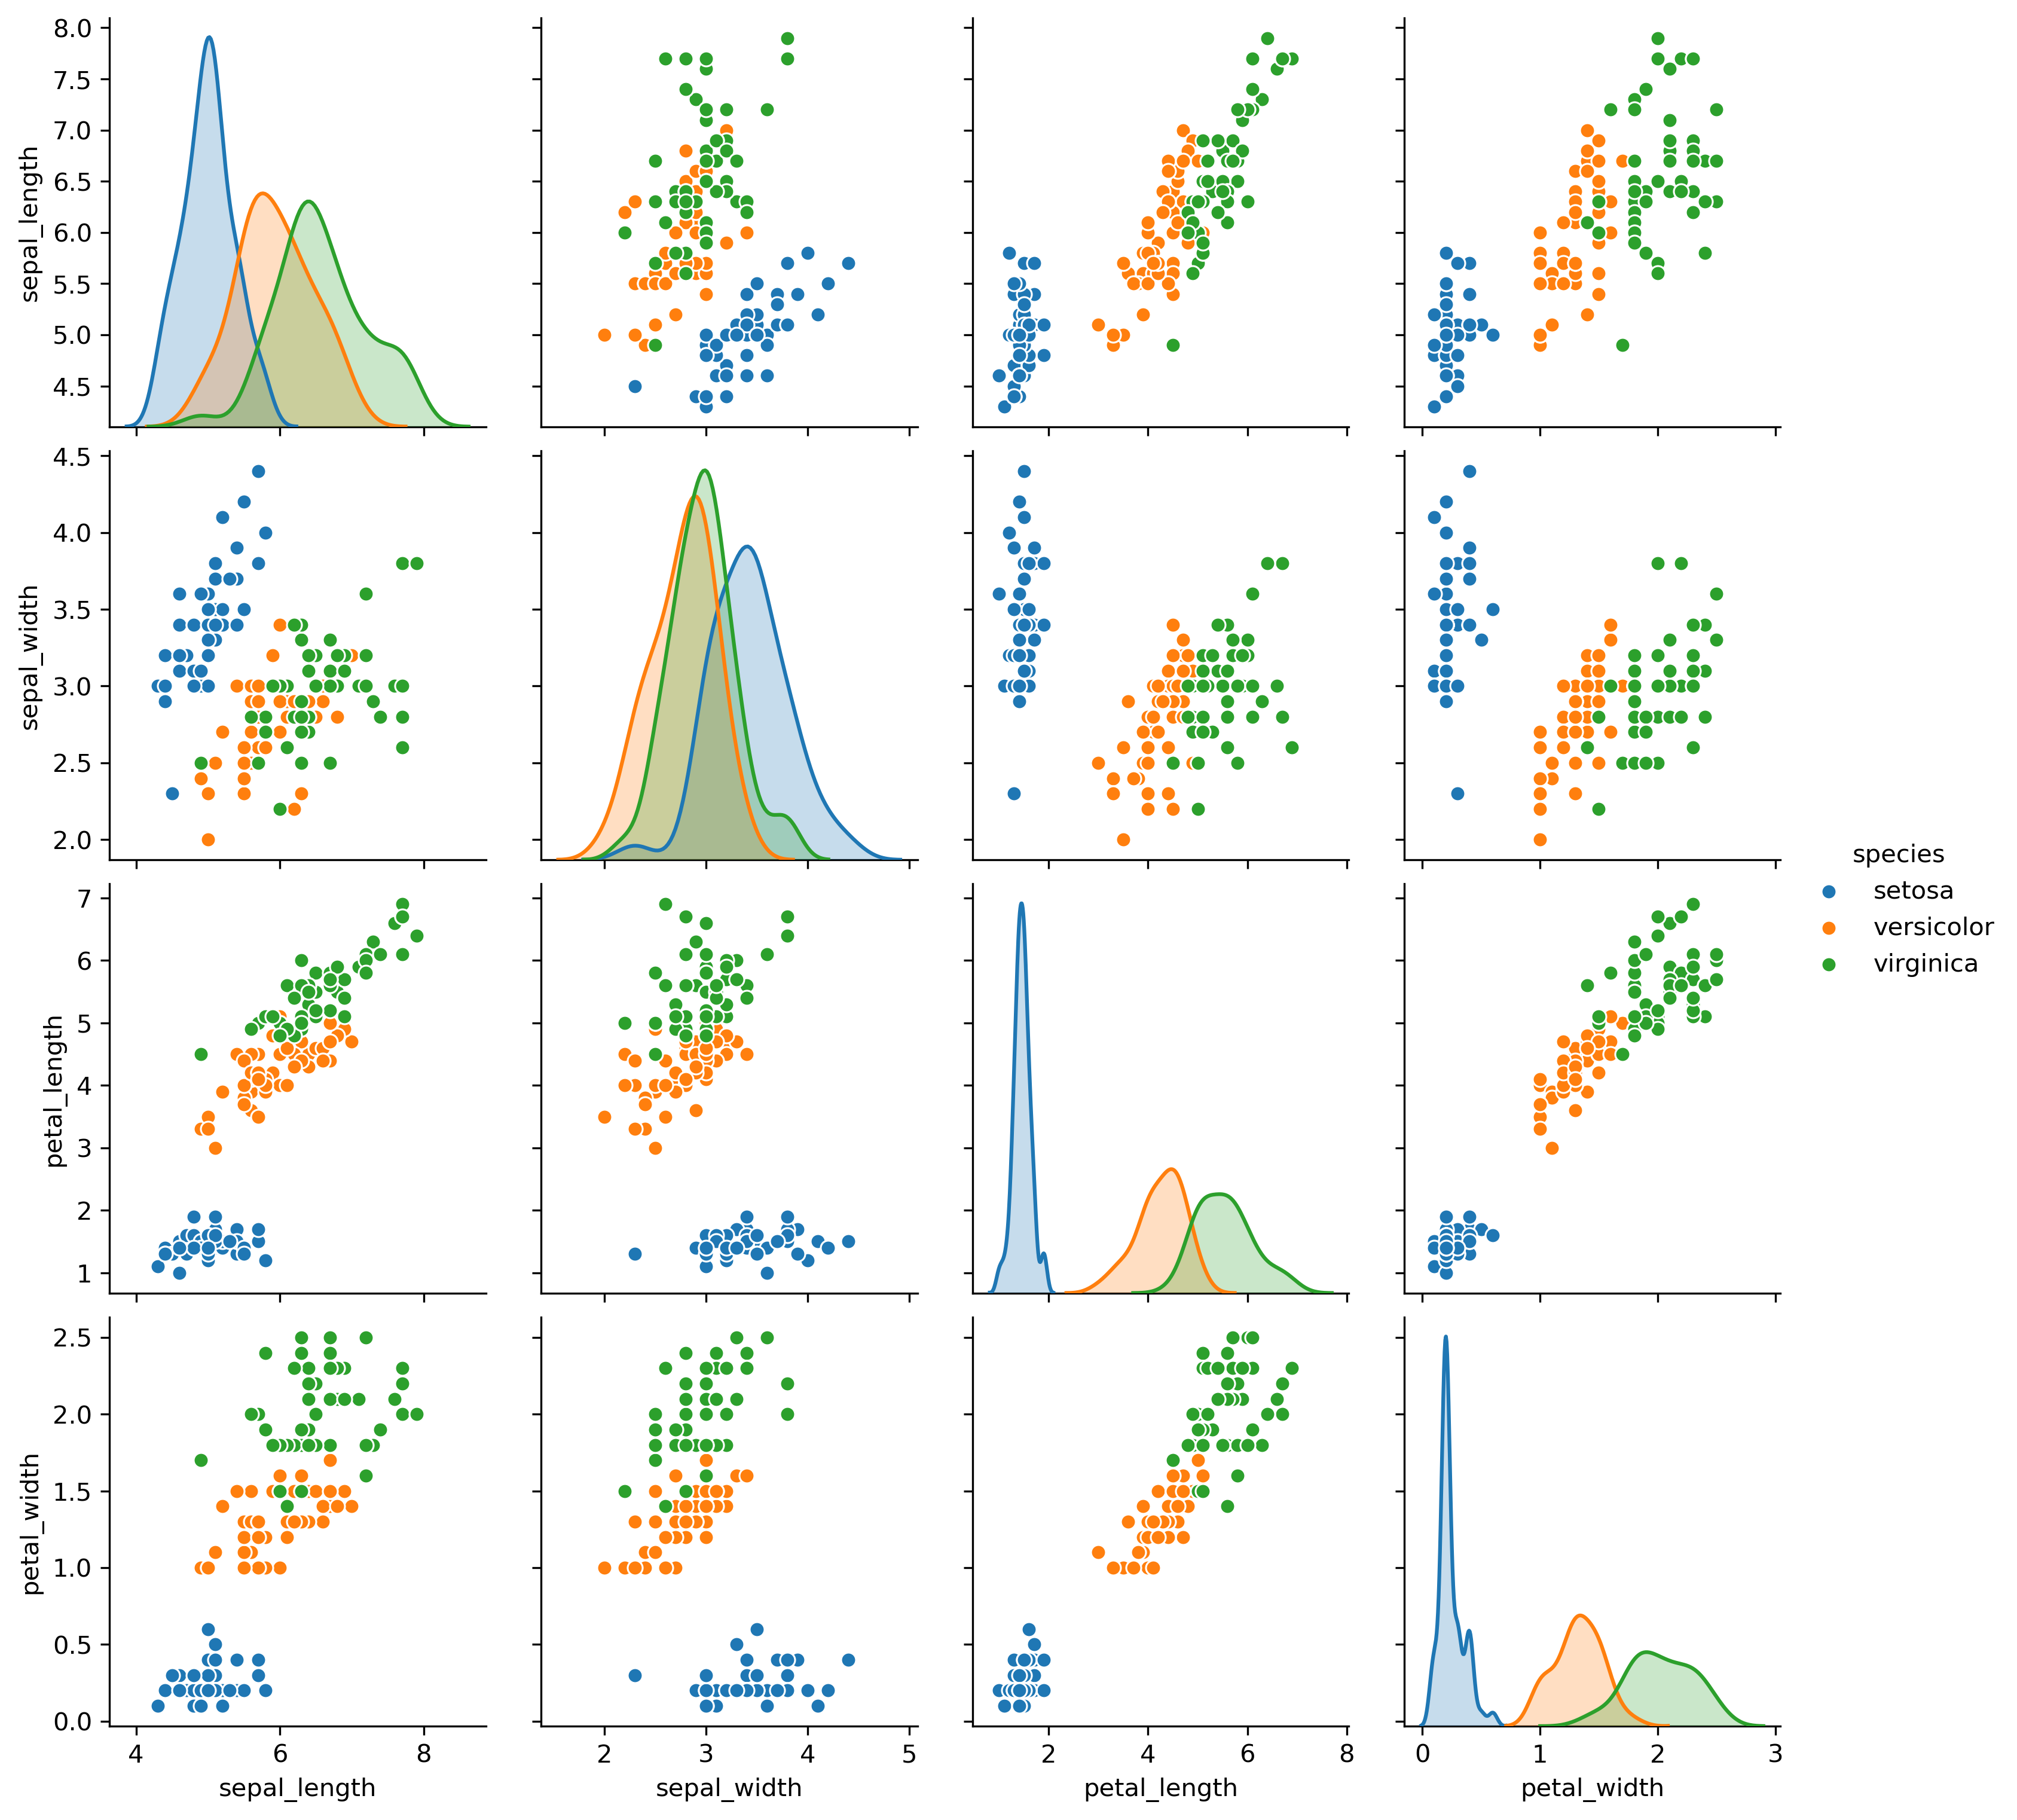

In [15]:
sns.pairplot(iris, hue='species')

![pandas-groupby](https://static.packt-cdn.com/products/9781783985128/graphics/5128OS_09_01.jpg)

| Nome da Função       | Descrição                            |
| -------------------  | ------------------------------------ |
| `count()`            | Número de valores não-NA             |
| `sum()`              | Soma de valores não-NA               |
| `mean()`             | Média de valores não-NA              |
| `median()`           | Mediana Aritmética de valores não-NA |
| `std()`              | Desvio padrão de valores não-NA      |
| `min()`, `max()`     | Mínimo e Máximo de valores não-NA    |
| `first()`, `last()`  | Primeiro e Último de valores não-NA  |